<a href="https://colab.research.google.com/github/deshanahan/DATA-602-Homework/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [8]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['Price'] = boston.target
newX = boston_df.drop('Price', axis = 1)
print(newX[0:3])
newY = boston_df['Price']
print(type(newY))

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03

[3 rows x 13 columns]
<class 'pandas.core.series.Series'>


In [9]:
X_train, X_test, y_train, y_test = train_test_split(newX, newY, test_size = 0.3, random_state = 42)
lr = LinearRegression()
rr = Ridge(alpha = 0.01)
rr100 = Ridge(alpha = 100)
lr.fit(X_train, y_train)
rr.fit(X_train, y_train)
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

The Ridge model with an alpha of 0.01 performed better than the Ridge model with an alpha of 100.  Linear Regression performed about the same as the Ridge model with an alpha of 0.01.

In [10]:
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train, y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train, y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print(f'Linear Regression: \n train score = {lr_train_score}\n test score = {lr_test_score}\n')
print(f'Ridge Regression alpha 0.01: \n train score = {Ridge_train_score}\n test score = {Ridge_test_score}\n')
print(f'Ridge Regression alpha 100: \n train score = {Ridge_train_score100}\n test score = {Ridge_test_score100}\n')

Linear Regression: 
 train score = 0.7434997532004697
 test score = 0.7112260057484874

Ridge Regression alpha 0.01: 
 train score = 0.7434990281567369
 test score = 0.7111351633163312

Ridge Regression alpha 100: 
 train score = 0.7175181067437365
 test score = 0.6850436955094981



The coefficients of the Ridge Regression model with an alpha of  0.01 and Linear Regression are identical on the graph. 

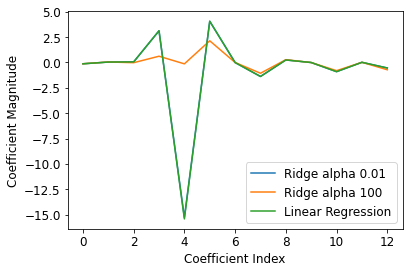

In [18]:
plt.plot(rr.coef_, label = 'Ridge alpha 0.01')
plt.plot(rr100.coef_, label = 'Ridge alpha 100')
plt.plot(lr.coef_, label = 'Linear Regression')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()
plt.show()